# ***Machine Learning  : CMPE-257***   

# **German Credit Data** 

## 1. ***Introduction***
> 1.1 Buisness Case and Value
## 2. ***Data Narative*** 
## 3. ***Data Visualization***
## 4. ***Data enrichment***
## 5. ***Second Data Enrichment***
## 6. ***Model Implementation***
> 6.1 K-mean Cluster<br>
> 6.2 GMM Cluster<br>
> 6.3 PCA<br>
> 6.4 XGBoost<br>
> 6.5 Linear Regression<br>
> 6.6 Latent variables<br>
> 6.7 Logistic Regression<br>
> 6.8 K-NN<br>
> 6.9 Random Forest<br>
> 6.10 Support Vector Machine<br>
> 6.11 Gaussian Naive Bayes<br>
## 7. ***Interpretation***
## 8. ***Metrics***
## 9. ***Conclusion***


## 1. ***Introduction***

Generally when a bank recieves a loan application, based on applicants profile the bank has to make a decision whether to go ahead with the loan approval or not. 

* If the applicant is a good credit risk, i.e. is likely to repay the loan<br>
* If the applicant is a bad credit risk, i.e. is not likely to repay the loan

> 1.1 Buisness Case and Value <br>
> From the bank's perspective, bank needs a decision rule regarding whom the loan should be approved based the socio-economic profile of the applicant. 
The objective is to develop a predictive model with the available German credit data to provide a guidence to the Bank management for making a decision whether to approve a loan to a prospective applicant based on hi/her profile.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
%pip install factor_analyzer
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import factor_analyzer
from factor_analyzer import FactorAnalyzer


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
file=requests.get(url).content


features = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
credit=pd.read_csv(io.StringIO(file.decode('utf-8')),names = features, delimiter=' ')
print(credit.shape)
credit.head(10)

(1000, 21)


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2


## 2. ***Data Narative*** 

German credit data has been loaded which consists of 20 variables and a classification whether an applicant is considered a good or bad credit risk for 1000 applicants. <br>
* This dataset consists of continous and categorical features. <br>
* In order to use this dataset effectively the one hot encoding is done on the dataset.<br>
* The classification column is the label. After one hot encoding we have around 60 columns of data.
* standard scaling is done on the dataset.

In [3]:

credit.classification.replace([1,2], [1,0], inplace=True)
credit.classification.value_counts()
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   employmentsince        1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   statussex              1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  residencesince         1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

In [0]:

cont_numb = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']

std_cont = pd.DataFrame(StandardScaler().fit_transform(credit[cont_numb].drop(['classification'], axis=1)))


In [0]:
catagor = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']
lb = defaultdict(LabelEncoder)
lb_en = credit[catagor].apply(lambda x: lb[x.name].fit_transform(x))
dummyvars = pd.get_dummies(credit[catagor])

In [6]:
credit_cat = pd.concat([credit[cont_numb], dummyvars], axis = 1)
print(credit_cat.shape)

(1000, 62)


In [0]:
X_credit = credit_cat.drop('classification', axis=1)
df=credit_cat
Y_credit = credit_cat['classification']

## 3. ***Data Visualization***
* Boxplot to identify the outliers if any.
* Plot to check how the age of the customer relates to the credit amount the customer.
* Histogram plot and distribution of creditamount 
* plot to check the classification of data.
* Plot to check the number of credit holders.
* Correlation plot to check the corelated features.
* Elbow curve is plotted to find the best number of clusters for k-means.
* Principle components are plotted.


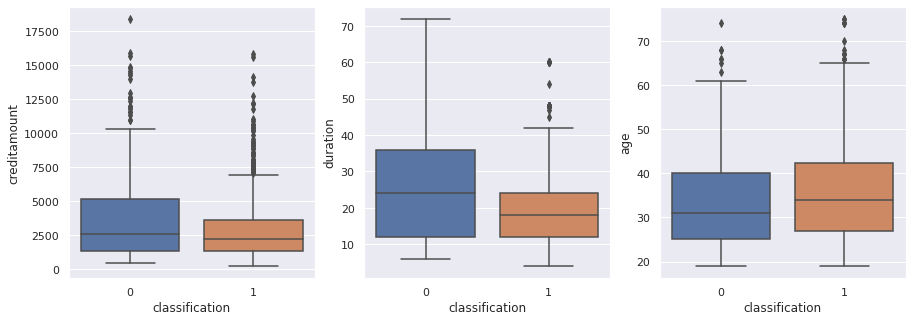

In [8]:
sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=df["creditamount"],x=df["classification"],orient='v' , ax=axes[0])
sns.boxplot(y=df["duration"],x=df["classification"], orient='v' , ax=axes[1])
sns.boxplot(y=df["age"],x=df["classification"], orient='v' , ax=axes[2])
plt.show()

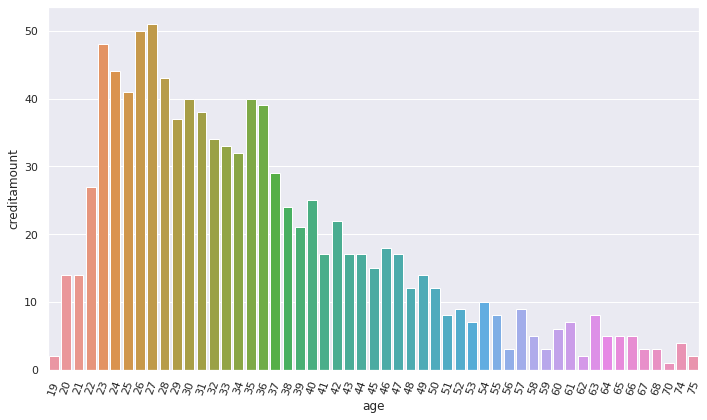

In [9]:
n_credits = X_credit.groupby("age")["creditamount"].count().reset_index()
n_credits.sort_values(by=["creditamount"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="age",y="creditamount",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=70)
plt.tight_layout()

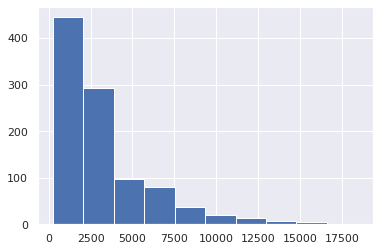

In [10]:

X_credit["creditamount"].hist()

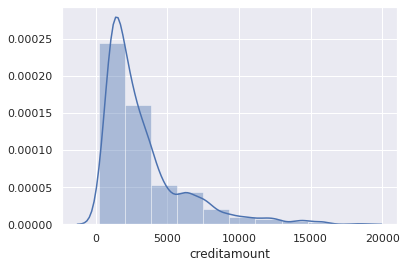

In [11]:
sns.distplot(X_credit['creditamount'], bins=10, kde=True)
plt.show()

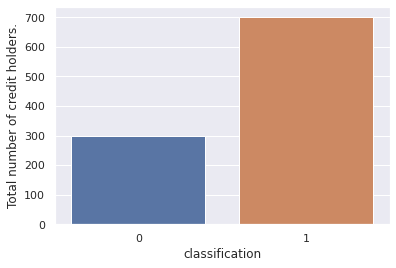

In [12]:

ax = sns.countplot('classification', data = credit_cat)
plt.ylabel('Total number of credit holders.')
plt.show()

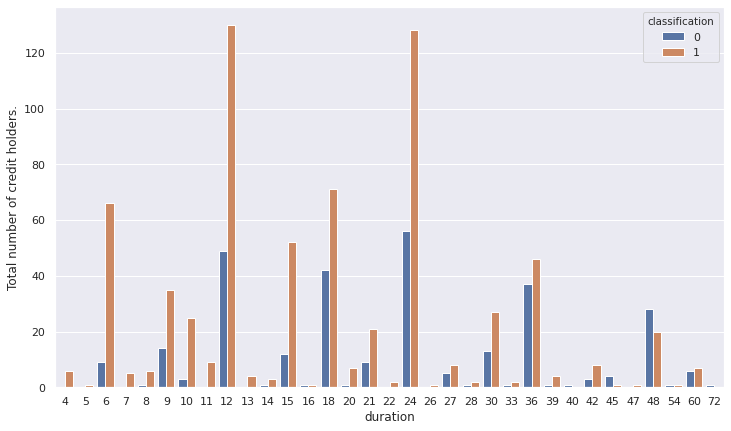

In [13]:
plt.figure(figsize=(12,7))
ax = sns.countplot('duration',hue='classification', data = credit_cat )
plt.ylabel('Total number of credit holders.')
plt.show()

In [0]:
#sns.pairplot(data = credit_cat)
#plt.show()

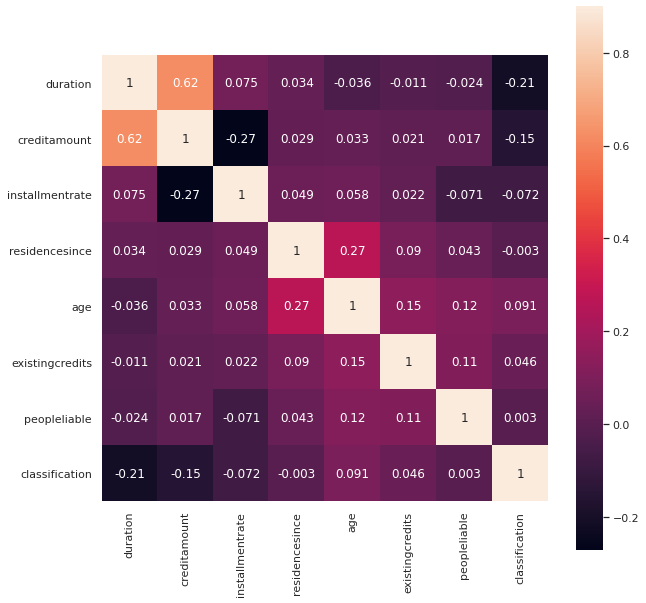

In [15]:
correlation = credit.corr(method='pearson')
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(10,10)
sns.heatmap(correlation,vmax = 0.9, square = True, annot = True)
plt.show()


In [0]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/german_credit_numeric_data_set.csv"
file=requests.get(url).content
german=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [0]:
def roc_plot (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

## 4. ***Data enrichment***
* The best features are selected based on univariate statistical tests.<br>
* L1 based feature selections are performed for better performance.
* Select the k best features.

In [18]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_credit, Y_credit)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_credit)
X_new.shape

(1000, 8)

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_uni = SelectKBest(chi2, k=2).fit_transform(X_credit, Y_credit)
X_uni.shape

(1000, 2)

In [0]:
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel
X_train, X_test, y_train, y_test = train_test_split(X_credit, Y_credit, test_size = 0.30,random_state=0)
unisk = SelectKBest(chi2, k=50)
unisk.fit(X_train, y_train)

# Apply fitted transformation to datasets
uniskX_train = unisk.transform(X_train)
uniskX_test = unisk.transform(X_test)
unisky_train = y_train
unisky_test = y_test

## 6. ***Model Implementation***

## 6.1 K-means Cluster

In [21]:
from sklearn.cluster import KMeans
x_clust = X_credit[['age','creditamount','duration']]
scaler = StandardScaler()
xscaled = scaler.fit_transform(x_clust)
xscaled

array([[ 2.76645648, -0.74513141, -1.23647786],
       [-1.19140394,  0.94981679,  2.24819436],
       [ 1.18331231, -0.41656241, -0.73866754],
       ...,
       [ 0.21583532, -0.87450324, -0.73866754],
       [-1.10345149, -0.50552769,  1.9992892 ],
       [-0.75164167,  0.46245715,  1.9992892 ]])

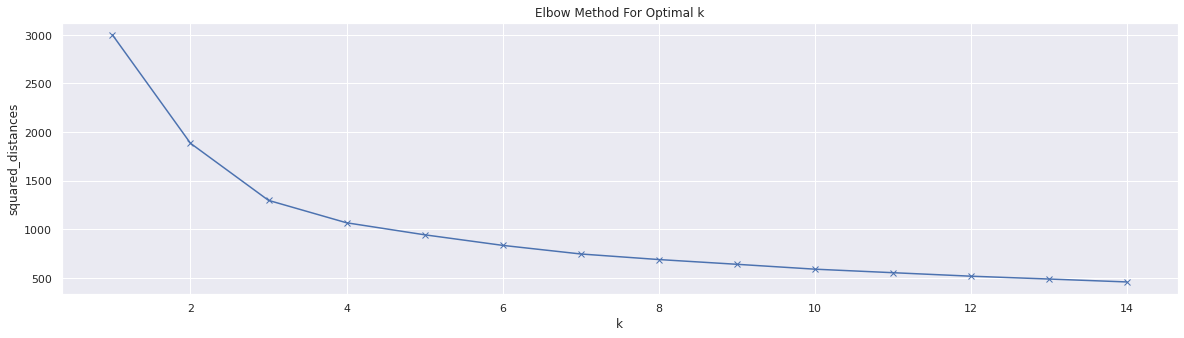

In [22]:
sqd = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xscaled)
    sqd.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, sqd, 'bx-')
plt.xlabel('k')
plt.ylabel('squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:

kmeans_ = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans_.fit_predict(xscaled)
kmeans_clus = x_clust.assign(Cluster=y_kmeans)
kmeans_group = kmeans_clus.groupby(['Cluster']).mean().round(1)
kmeans_group

,age,creditamount,duration
Cluster,,,
0,34.8,7609.6,39.3
1,51.7,2398.5,15.8
2,29.7,2207.5,16.9


K-Means


0.3894237180526776

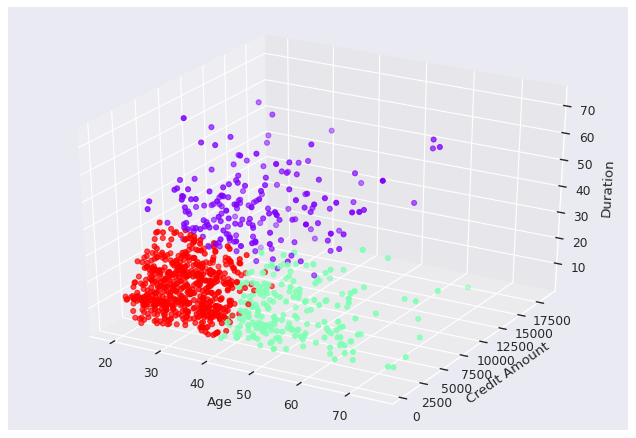

In [24]:
from sklearn.metrics import silhouette_score
fig = plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(x_clust['age'],x_clust['creditamount'],x_clust['duration'],c=y_kmeans, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")
sil_score = silhouette_score(xscaled, y_kmeans, metric='euclidean', sample_size=None, random_state=None)
sil_score

## 6.2 GMM Clustering

In [25]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3, covariance_type="spherical").fit(xscaled)
labels = gmm.predict(xscaled)
GMM_sil_score = silhouette_score(xscaled, labels, metric='euclidean', sample_size=None, random_state=None)
GMM_sil_score

0.37292045206745855

GMM - Clustering


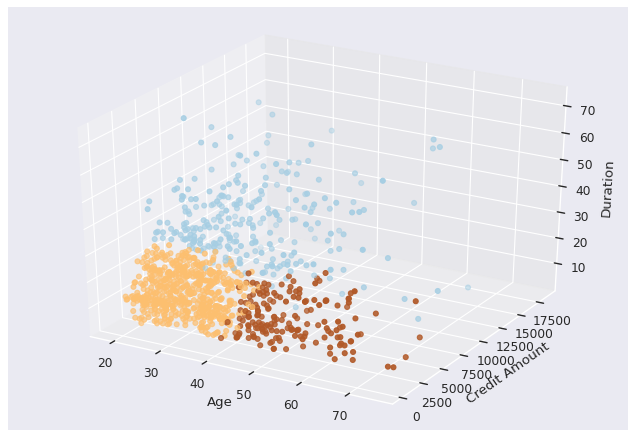

In [26]:
fig = plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(x_clust['age'],x_clust['creditamount'],x_clust['duration'],c=labels, cmap=plt.cm.Paired)

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("GMM - Clustering")


## 6.3 PCA - Principle Component Analysis

In [0]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_credit)

PCA- Principle Component Analysis


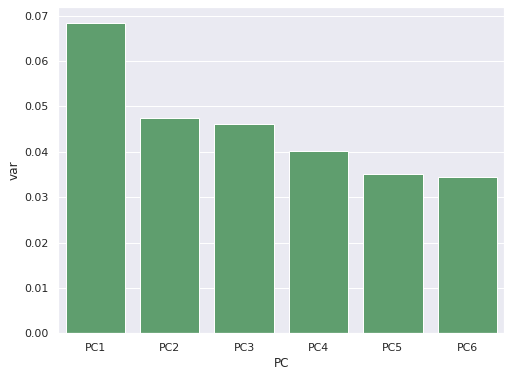

In [28]:

pca = PCA(n_components=10)
X = pca.fit_transform(x_scaled)
plt.figure(figsize=(8,6))
pca = PCA(n_components=6)
pca.fit_transform(x_scaled)
pca.explained_variance_ratio_
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4', 'PC5','PC6']})
sns.barplot(x='PC',y="var", 
           data=df, color="g");
print("PCA- Principle Component Analysis")

## 6.4 XGBOOST

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_credit, Y_credit, test_size = 0.30,random_state=0)
model=XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ")
print(round(accuracy_score(y_test,y_pred)*100,2))

Accuracy: 
77.67


              precision    recall  f1-score   support

         Bad       0.64      0.50      0.56        86
        Good       0.82      0.89      0.85       214

    accuracy                           0.78       300
   macro avg       0.73      0.69      0.71       300
weighted avg       0.77      0.78      0.77       300



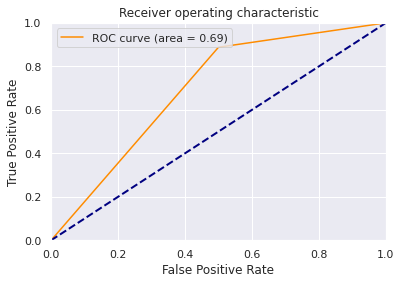

In [30]:
cm= confusion_matrix(y_test, y_pred)
labels = ['Bad', 'Good']
print(classification_report(y_test, y_pred, target_names=labels))
roc_plot(y_test, y_pred)

## 6.5 Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
#xtrain = credit_cat[[ 'duration', 'installmentrate', 'residencesince', 'age', 
#           'existingcredits', 'peopleliable', 'classification']]
ytrain = credit_cat['creditamount']
xtrain = credit_cat.drop(['creditamount'], axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(xtrain,ytrain,test_size=0.10,random_state=2)

In [32]:
model = LinearRegression()
model.fit(Xtrain,Ytrain)
y_pred=model.predict(Xtest)
print(model.score(Xtest,Ytest)*100)


51.73043821789498


##6.6. Latent Variables and Latent Manifold

In [33]:

fact=FactorAnalyzer(n_factors=6, rotation="varimax")
fact.fit(x_scaled)
loadings=fact.loadings_
ev,v=fact.get_eigenvalues()
vals=range(1,X_credit.shape[1]+1)
latent_var =pd.DataFrame(fact.loadings_)
print(latent_var)

           0         1         2         3         4         5
0   0.597080  0.026020  0.074347  0.033857 -0.070562  0.134846
1   0.437564  0.020695  0.059725 -0.125197 -0.049605  0.133183
2  -0.065971  0.154429  0.017780 -0.158673  0.009548 -0.026396
3   0.073128  0.181603  0.353249 -0.020222  0.021676 -0.079338
4   0.066614  0.469959  0.211612  0.031872  0.030722 -0.002297
..       ...       ...       ...       ...       ...       ...
56  0.521037  0.066112  0.063629  0.061529 -0.023878  0.120822
57 -0.740133 -0.137925  0.101063  0.031383 -0.037771  0.026469
58  0.740133  0.137925 -0.101063 -0.031383  0.037771 -0.026469
59  0.106268 -0.047271  0.131110 -0.918522  0.105630  0.076715
60 -0.106268  0.047271 -0.131110  0.918522 -0.105630 -0.076715

[61 rows x 6 columns]


Scree Plot


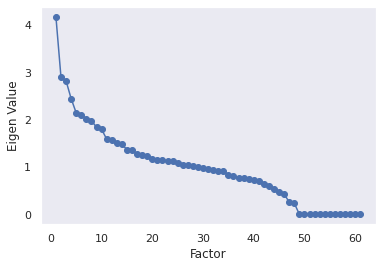

In [34]:
plt.scatter(vals,ev)
plt.plot(vals,ev)
print("Scree Plot")
plt.xlabel('Factor')
plt.ylabel('Eigen Value')
plt.grid()
plt.show()


In [35]:
from sklearn.decomposition import FactorAnalysis

fact_naive = FactorAnalysis(1)
fact_naive.fit(x_scaled)
ev = fact_naive.get_covariance()
v = fact_naive.noise_variance_
vals=range(1,X_credit.shape[1]+1)
print(ev)

[[ 1.01027755  0.21993318  0.01052765 ...  0.34463298  0.0997347
  -0.0997347 ]
 [ 0.21993318  1.00505109  0.00827042 ...  0.27074049  0.07835066
  -0.07835066]
 [ 0.01052765  0.00827042  0.99970387 ...  0.01295967  0.00375045
  -0.00375045]
 ...
 [ 0.34463298  0.27074049  0.01295967 ...  1.01858367  0.12277467
  -0.12277467]
 [ 0.0997347   0.07835066  0.00375045 ...  0.12277467  0.99989873
  -0.03553025]
 [-0.0997347  -0.07835066 -0.00375045 ... -0.12277467 -0.03553025
   0.99989873]]


Scree plot


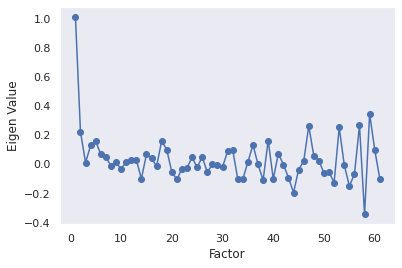

In [36]:
plt.scatter(vals,ev[0])
plt.plot(vals,ev[0])
print('Scree plot')
plt.xlabel('Factor')
plt.ylabel('Eigen Value')
plt.grid()
plt.show()

## Latent Manifold.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


array([[-2177.30860904,   -25.77202862],
       [ 2747.13984408,    32.37528698],
       [-1184.92505867,    49.25863861],
       ...,
       [-2548.31195179,   -63.85362199],
       [-1460.67782193,    74.34245339],
       [ 1364.44748024,    28.74017332]])

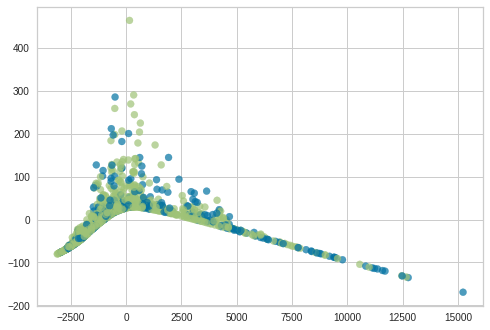

In [37]:
from yellowbrick.features import Manifold
from sklearn.pipeline import Pipeline
classes = ["bad", "good"]
latent_model = Manifold(manifold="isomap", classes=classes)

latent_model.fit_transform(X_credit, Y_credit) 

##6.7. Logistic Regression

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_credit, test_size = 0.30,random_state=0)
model2 = LogisticRegression()
model2.fit(X_train,y_train)
y_lgr_pred=model2.predict(X_test)
from sklearn.metrics import mean_squared_error
res = mean_squared_error(y_lgr_pred, y_test)
print(res)
model2.score(X_test,y_test)

0.24333333333333335


0.7566666666666667

              precision    recall  f1-score   support

         Bad       0.59      0.48      0.53        86
        Good       0.81      0.87      0.84       214

    accuracy                           0.76       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.74      0.76      0.75       300



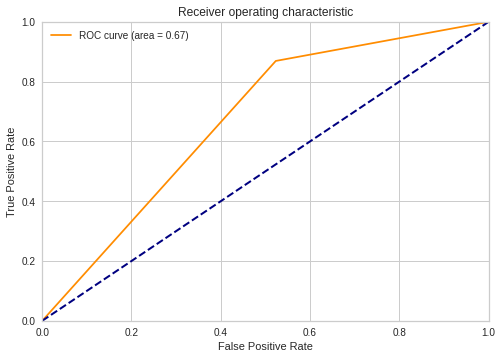

In [39]:
cm= confusion_matrix(y_test, y_lgr_pred)
labels = ['Bad', 'Good']
print(classification_report(y_test, y_lgr_pred, target_names=labels))
roc_plot(y_test, y_lgr_pred)

##6.8. K-NN K-NN

69.66666666666667
              precision    recall  f1-score   support

         Bad       0.47      0.47      0.47        86
        Good       0.79      0.79      0.79       214

    accuracy                           0.70       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.70      0.70      0.70       300



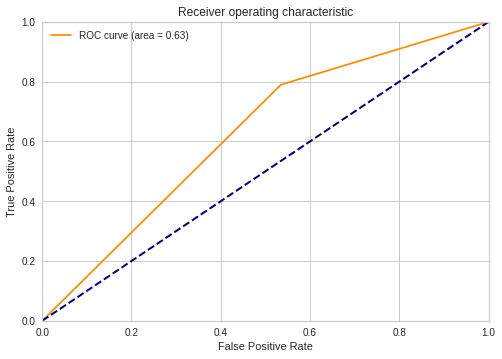

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn.score(X_test, y_test)*100)
print(classification_report(y_test, knn_pred, target_names=labels))
roc_plot(y_test, knn_pred)

##6.9. Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()

Accuracy: 0.77
Confusion Matrix: [ 43  26  43 188]
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.62      0.55        69
           1       0.88      0.81      0.84       231

    accuracy                           0.77       300
   macro avg       0.69      0.72      0.70       300
weighted avg       0.79      0.77      0.78       300



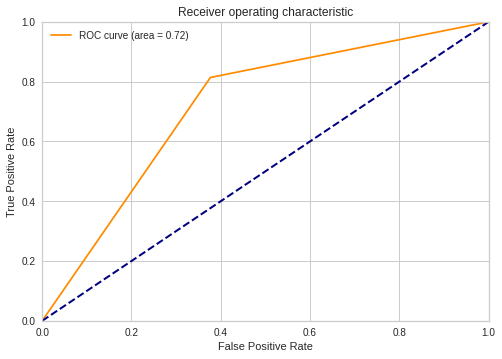

In [42]:
rforest.fit(X_train,y_train)
rforest_pred = rforest.predict(X_test)
print('Accuracy:',accuracy_score(rforest_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(rforest_pred,y_test).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rforest_pred,y_test))
roc_plot(rforest_pred,y_test)


##6.10. Support Vector Machine

Accuracy: 0.73
Confusion Matrix: [[ 31  26]
 [ 55 188]]
Classification report:
              precision    recall  f1-score   support

           0       0.36      0.54      0.43        57
           1       0.88      0.77      0.82       243

    accuracy                           0.73       300
   macro avg       0.62      0.66      0.63       300
weighted avg       0.78      0.73      0.75       300



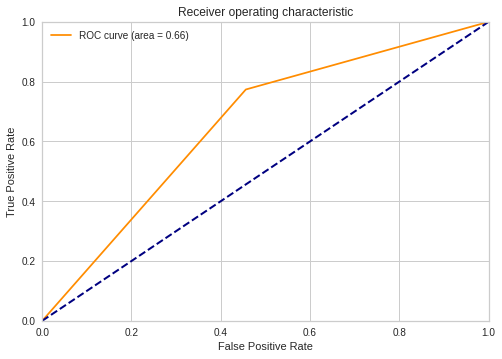

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_credit, test_size = 0.30,random_state=0)
from sklearn.svm import SVC
svc_clf = SVC(random_state=42,kernel='linear')
svc_clf.fit(X_train,y_train)
svc_pred = svc_clf.predict(X_test)

print('Accuracy:',accuracy_score(svc_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(svc_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(svc_pred,y_test))
roc_plot(svc_pred,y_test)


##6.11. Gaussian Naive Bayes

Model accuracy score: 0.7367
              precision    recall  f1-score   support

           0       0.60      0.54      0.57        97
           1       0.79      0.83      0.81       203

    accuracy                           0.74       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.73      0.74      0.73       300

[[ 52  34]
 [ 45 169]]


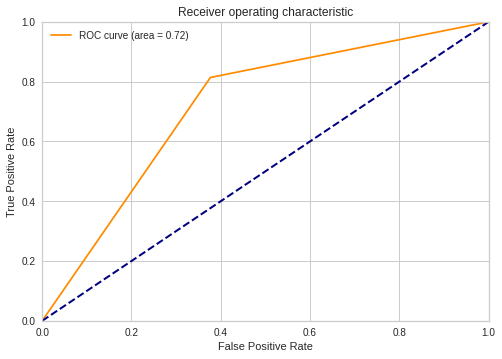

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(cm)
roc_plot(rforest_pred,y_test)

## 8. ***Metrics***

###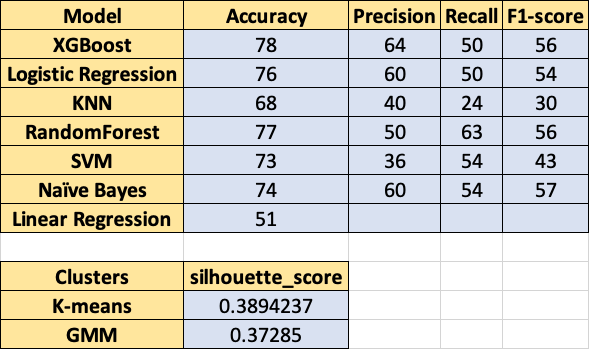




* From the metrics  Xgboost performs better than all other classification models.  All the classification models performance is almost similar. Logistic regression could get an accuracy after feature reduction.
* We see that Random forest gives the best recall.
* Linear Regression was just tried with the creditamount as label which gives a lesser accuracy value. This is more of a classification problem.


## 9. ***Conclusion***

* We have explored the German credit card data which had 20 features a combination of catagorical and continous.
* First we scaled the features and combined the features. 
* The Average age of people in the dataset are 35.5, there were more males who applied for credit card than females. 
* Plotted the credit amount borrowed by differnt age groups to see if there were any patterns based on age groups. 
* Correlation was plotted to see which features directly affected the risk of the loan.
* Cluster number was choosen as 3 from the elbow curve.
* PCA was used to reduce the dimensions of the data .
* This dataset had lot of categorical values which was transformed using one hot encoding, sampling was performed on that dataset as part of data preprocessing. 
* Almost all the classification models gave the similar accuracy where as the precission and recall between them varied. The above metrics shows the detailed results.